In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel(r'/content/RFM_Customer.xlsx')

# **Exploritory Data Analysis**

In [ ]:
df.head(5)

,Customer_ID,ultimo acquisto,numero acquisti,totale acquisto,RECENCY,FREQUENCY,MONETARY,CONCAT
0,2547,106,7,155.12,2,5,5,255
1,822,34,3,20.40,1,4,3,143
2,3686,67,15,531.03,1,5,5,155
3,3719,64,10,582.35,1,5,5,155
4,9200,99,2,18.01,2,3,2,232


<ipython-input-4-525da3e59730>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['ultimo acquisto'])


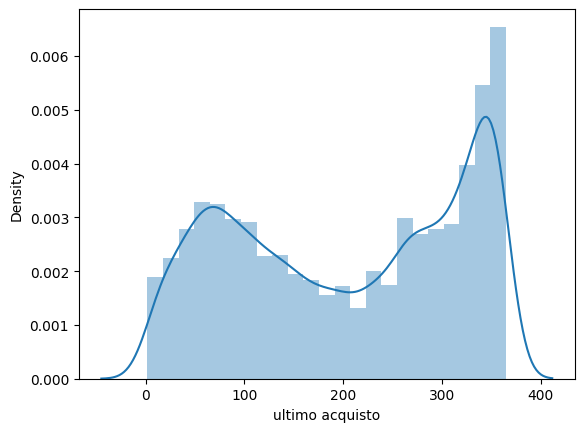

In [ ]:
ax = sns.distplot(df['ultimo acquisto'])


<ipython-input-5-7b6657f5282b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['numero acquisti'])


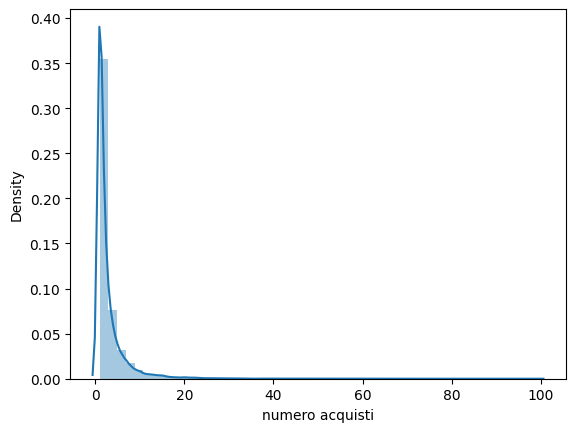

In [ ]:
ax = sns.distplot(df['numero acquisti'])

<ipython-input-6-eb35bbdf13ec>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(filtered_data['numero acquisti'])


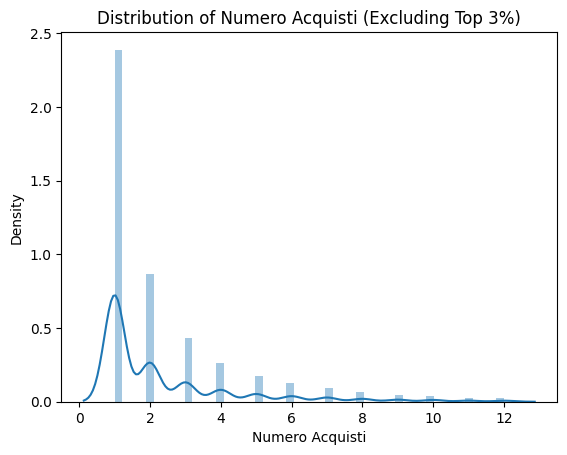

In [ ]:
top_3_percentile = df['numero acquisti'].quantile(0.97)

# Filtering the 'numero acquisti' column to exclude values above the threshold
filtered_data = df[df['numero acquisti'] <= top_3_percentile]

ax = sns.distplot(filtered_data['numero acquisti'])
plt.title('Distribution of Numero Acquisti (Excluding Top 3%)')
plt.xlabel('Numero Acquisti')
plt.ylabel('Density')

plt.show()

<ipython-input-7-64af01d812a4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['totale acquisto'])


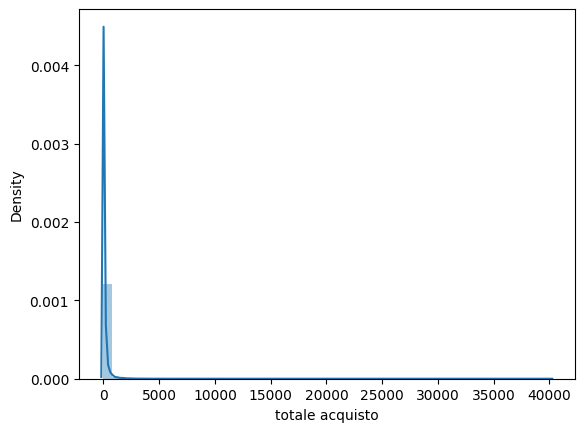

In [ ]:
ax = sns.distplot(df['totale acquisto'])

<ipython-input-8-0c37b6377e87>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(filtered_data1['totale acquisto'])


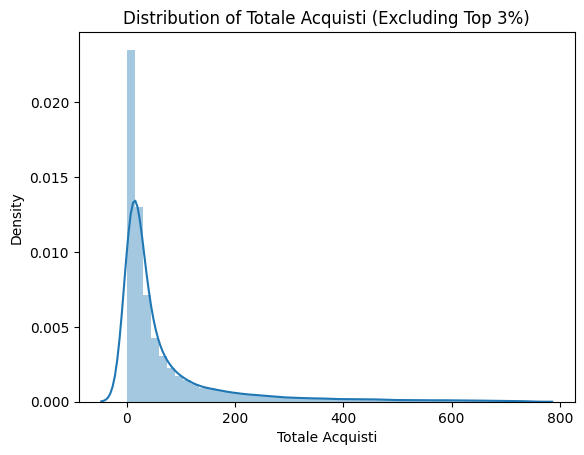

In [ ]:
top_3_percentile1 = df['totale acquisto'].quantile(0.97)

filtered_data1 = df[df['totale acquisto'] <= top_3_percentile1]

ax1 = sns.distplot(filtered_data1['totale acquisto'])

plt.title('Distribution of Totale Acquisti (Excluding Top 3%)')
plt.xlabel('Totale Acquisti')
plt.ylabel('Density')

plt.show()

In [ ]:
df['r'] = pd.qcut(df['ultimo acquisto'], q=5, labels=[5, 4, 3, 2, 1])

In [ ]:
df.groupby('r').agg(
    count=('Customer_ID', 'count'),
    min_recency=('ultimo acquisto', min),
    max_recency=('ultimo acquisto', max),
    std_recency=('ultimo acquisto', 'std'),
    avg_recency=('ultimo acquisto', 'mean')
).sort_values(by='avg_recency')

,count,min_recency,max_recency,std_recency,avg_recency
r,,,,,
5,4583,2,77,21.404010,44.316387
4,4468,78,155,22.418811,113.438227
3,4552,156,265,33.686197,214.175967
2,4552,266,331,19.500075,300.693761
1,4470,332,365,9.244644,349.624609


In [ ]:
df_h1 = df[['ultimo acquisto', 'numero acquisti', 'totale acquisto']]

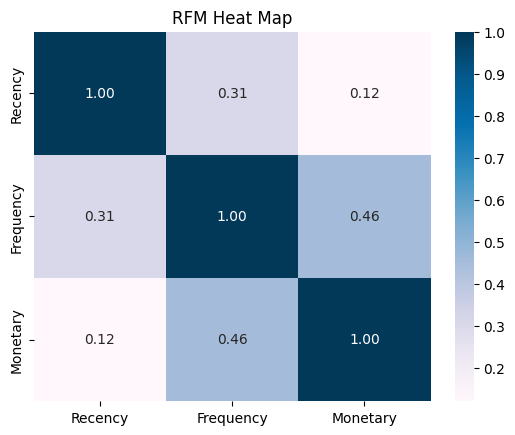

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

heatmap = sns.heatmap(df_h1.corr(), annot=True, cmap='PuBu', fmt='.2f',
                      xticklabels=['Recency', 'Frequency', 'Monetary'],
                      yticklabels=['Recency', 'Frequency', 'Monetary'])
plt.title("RFM Heat Map")

plt.show()


The heatmap's color spectrum and associated values provide a visual
representation of the correlation's magnitude and direction between variable pairs. Colors
within the heatmap correspond to the strength of the correlation between two variables.
Employing the 'PuBu' colormap, darker blue tones indicate a positive correlation, while lighter
hues suggest a weaker or negative correlation. Positive correlation signifies that as one
variable escalates, the other tends to follow suit. Conversely, a negative correlation indicates
that an increase in one variable typically corresponds to a decrease in the other. Each heatmap
cell houses a numerical correlation coefficient, ranging from -1 to 1. A coefficient of -1 indicates
a perfect negative correlation, 1 signifies a perfect positive correlation, and 0 denotes no
correlation. A positive correlation of 0.46 between 'Monetary' and 'Frequency' underscores that
customers who expend more tend to make frequent purchases. It is crucial to emphasize that
correlation does not imply causation; it establishes a statistical connection between variables
without implying a direct cause-and-effect relationship

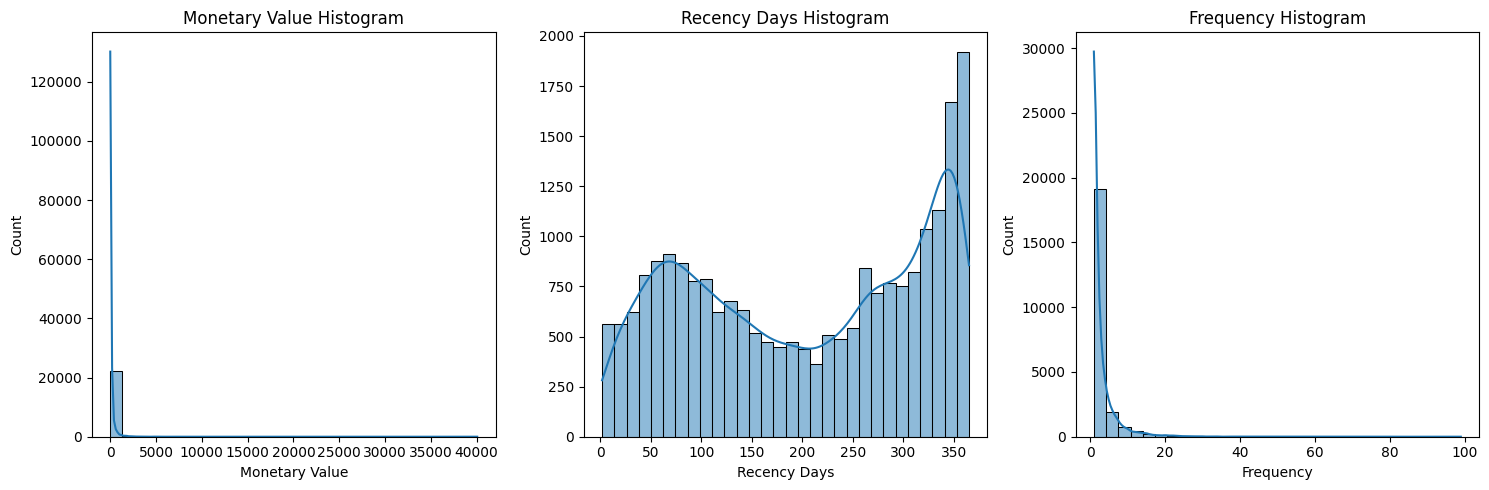

In [ ]:
def rfm_histograms(dataframe):
    monetary_values = dataframe['totale acquisto']
    recency_days = dataframe['ultimo acquisto']
    frequency = dataframe['numero acquisti']

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    sns.histplot(monetary_values, ax=axes[0], bins=30, kde=True)
    axes[0].set_title('Monetary Value Histogram')
    axes[0].set_xlabel('Monetary Value')
    axes[0].set_ylabel('Count')

    sns.histplot(recency_days, ax=axes[1], bins=30, kde=True)
    axes[1].set_title('Recency Days Histogram')
    axes[1].set_xlabel('Recency Days')
    axes[1].set_ylabel('Count')

    sns.histplot(frequency, ax=axes[2], bins=30, kde=True)
    axes[2].set_title('Frequency Histogram')
    axes[2].set_xlabel('Frequency')
    axes[2].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

figo = rfm_histograms(df)
figo

Upon analyzing the value distribution using histograms, it becomes evident that both frequency
and monetary attributes exhibit pronounced asymmetry. This phenomenon is largely attributed
to the presence of exceptionally high maximum values in both histograms. Specifically, the
frequency histogram illustrates that a mere 2.5% of the frequency values surpass 13. Similarly,
within the monetary histogram, the values exceeding 1000 constitute slightly less than 2% of
the total.
Contrasting this, the recency attribute displays a notable concentration toward higher values,
indicating a substantial portion of consumers engaging in recent purchases.

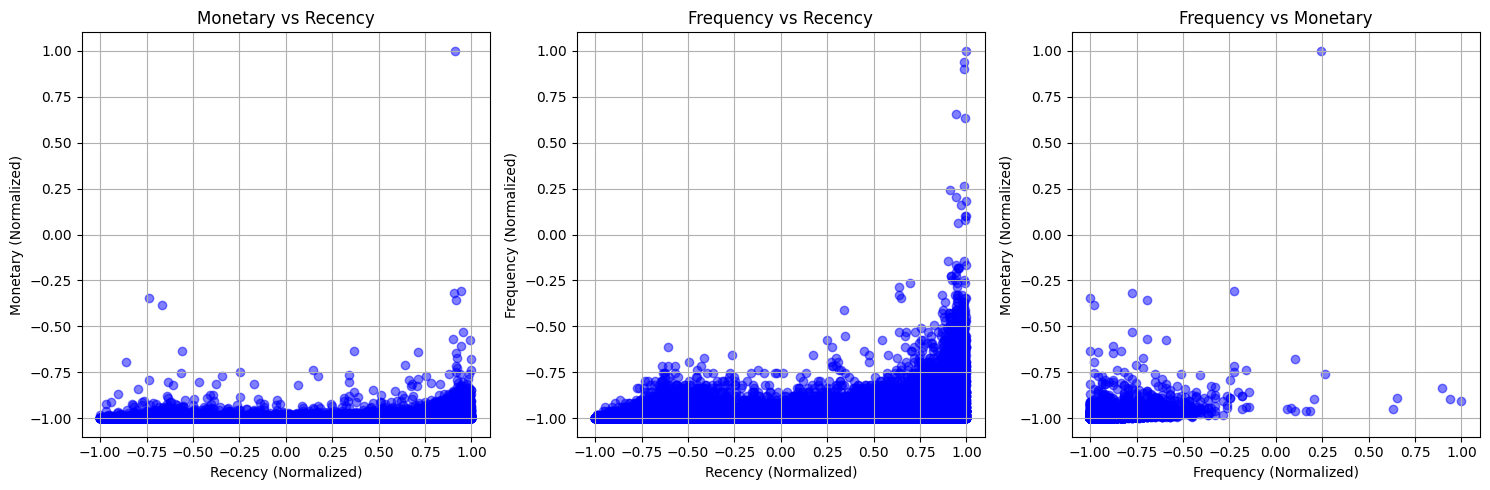

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def scatter_plot_frequency_vs_recency(dataframe, ax=None):
    frequency = dataframe['numero acquisti']
    recency = dataframe['ultimo acquisto']

    scaler = MinMaxScaler(feature_range=(-1, 1))
    frequency_scaled = scaler.fit_transform(frequency.values.reshape(-1, 1))
    recency_scaled = scaler.fit_transform(recency.values.reshape(-1, 1))

    if ax is None:
        plt.figure(figsize=(8, 6))
        ax = plt.gca()
    ax.scatter(recency_scaled, frequency_scaled, c='blue', alpha=0.5)
    ax.set_title('Scatter Plot: Frequency vs. Recency (Normalized)')
    ax.set_xlabel('Recency (Normalized)')
    ax.set_ylabel('Frequency (Normalized)')
    ax.grid(True)

def scatter_plot_monetary_vs_recency(dataframe, ax=None):
    monetary = dataframe['totale acquisto']
    recency = dataframe['ultimo acquisto']

    scaler = MinMaxScaler(feature_range=(-1, 1))
    monetary_scaled = scaler.fit_transform(monetary.values.reshape(-1, 1))
    recency_scaled = scaler.fit_transform(recency.values.reshape(-1, 1))

    if ax is None:
        plt.figure(figsize=(8, 6))
        ax = plt.gca()
    ax.scatter(recency_scaled, monetary_scaled, c='blue', alpha=0.5)
    ax.set_title('Scatter Plot: Monetary vs. Recency (Normalized)')
    ax.set_xlabel('Recency (Normalized)')
    ax.set_ylabel('Monetary (Normalized)')
    ax.grid(True)

def scatter_plot_frequency_vs_monetary(dataframe, ax=None):
    frequency = dataframe['numero acquisti']
    monetary = dataframe['totale acquisto']

    scaler = MinMaxScaler(feature_range=(-1, 1))
    frequency_scaled = scaler.fit_transform(frequency.values.reshape(-1, 1))
    monetary_scaled = scaler.fit_transform(monetary.values.reshape(-1, 1))

    if ax is None:
        plt.figure(figsize=(8, 6))
        ax = plt.gca()
    ax.scatter(frequency_scaled, monetary_scaled, c='blue', alpha=0.5)
    ax.set_title('Scatter Plot: Frequency vs. Monetary (Normalized)')
    ax.set_xlabel('Frequency (Normalized)')
    ax.set_ylabel('Monetary (Normalized)')
    ax.grid(True)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

scatter_plot_monetary_vs_recency(df, ax=axes[0])
scatter_plot_frequency_vs_recency(df, ax=axes[1])
scatter_plot_frequency_vs_monetary(df, ax=axes[2])

axes[0].set_title('Monetary vs Recency')
axes[1].set_title('Frequency vs Recency')
axes[2].set_title('Frequency vs Monetary')

plt.tight_layout()

plt.savefig('scatter_plots.png')
plt.show()

While the relationship between Monetary and Frequency indicates a slight positive correlation,
the correlation between recency and monetary remains notably weak, lacking significant
implications. Furthermore, this analysis unveils that more recent consumers demonstrate a
propensity for increased purchase activity. To facilitate a clearer visualization of the variable
relationships, three scatterplots showcasing paired variables have been generated. Notably,
these scatterplots employ normalized variable values to ensure an accurate portrayal of the
relationships without distortion.

In [ ]:
df.describe()

,Customer_ID,ultimo acquisto,numero acquisti,totale acquisto,RECENCY,FREQUENCY,MONETARY,CONCAT
count,22625.000000,22625.000000,22625.000000,22625.000000,22625.000000,22625.000000,22625.000000,22625.000000
mean,11313.000000,204.042122,2.858873,122.011597,2.993724,2.950276,2.999823,331.874961
std,6531.419256,115.718072,4.000157,482.101570,1.413950,1.130791,1.414307,146.058608
min,1.000000,2.000000,1.000000,0.140000,1.000000,2.000000,1.000000,121.000000
25%,5657.000000,94.000000,1.000000,10.810000,2.000000,2.000000,2.000000,222.000000
50%,11313.000000,216.000000,1.000000,27.260000,3.000000,2.000000,3.000000,324.000000
75%,16969.000000,318.000000,3.000000,83.080000,4.000000,4.000000,4.000000,444.000000
max,22625.000000,365.000000,99.000000,40070.491000,5.000000,5.000000,5.000000,555.000000


In [ ]:
df.head()

,Customer_ID,ultimo acquisto,numero acquisti,totale acquisto,RECENCY,FREQUENCY,MONETARY,CONCAT,r
0,2547,106,7,155.12,2,5,5,255,4
1,822,34,3,20.40,1,4,3,143,5
2,3686,67,15,531.03,1,5,5,155,5
3,3719,64,10,582.35,1,5,5,155,5
4,9200,99,2,18.01,2,3,2,232,4


# **Data Normalization**

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_normalized = df [['ultimo acquisto','numero acquisti','totale acquisto']]

columns_for_clustering = ['ultimo acquisto', 'numero acquisti', 'totale acquisto']

df_clustering = df[columns_for_clustering]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering)

In [ ]:
rfm_normalized = scaler.fit_transform(rfm_normalized)
rfm_normalized = pd.DataFrame(rfm_normalized)
rfm_normalized

,0,1,2
0,-0.847269,1.035264,0.068677
1,-1.469484,0.035281,-0.210773
2,-1.184302,3.035230,0.848426
3,-1.210228,1.785251,0.954879
4,-0.907762,-0.214715,-0.215730
...,...,...,...
22620,-0.164560,-0.464710,-0.198036
22621,0.077413,-0.464710,-0.226351
22622,-0.164560,-0.464710,-0.129481
22623,-0.164560,-0.464710,-0.250620


# **ML Algorithms**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

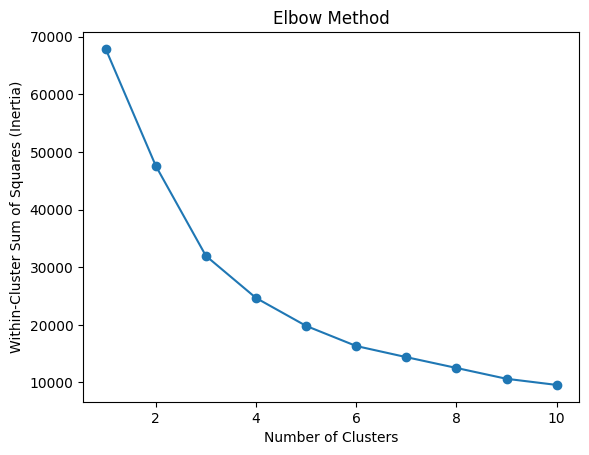

In [ ]:
inertia_values = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

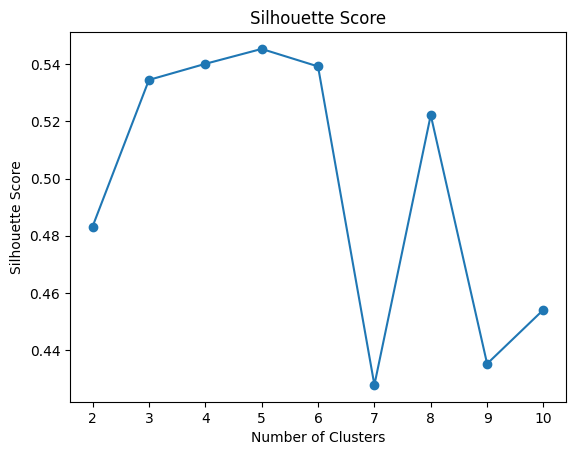

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaled_data)
    cluster_labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(scaled_data, cluster_labels))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
   ultimo acquisto  numero acquisti  totale acquisto
0       298.082867         2.383995        71.397903
1        93.006521         1.756923        61.258015
2       308.672727        25.418182      4055.555399
3       349.000000        62.000000     40070.491000
4       327.682540        13.051948       629.961075

Number of Customers in Each Cluster:
1    10581
0    10548
4     1385
2      110
3        1
Name: Cluster, dtype: int64


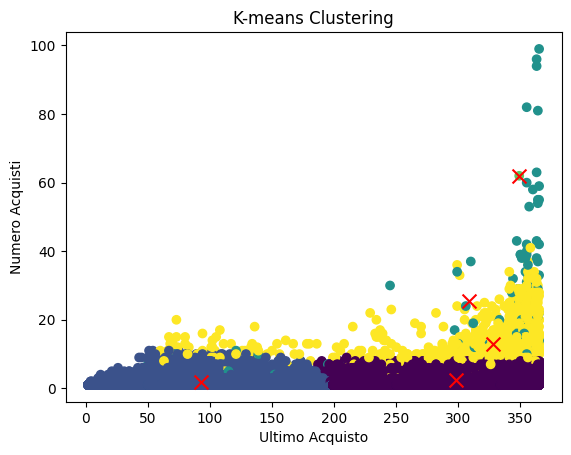

In [ ]:
columns_for_clustering = ['ultimo acquisto', 'numero acquisti', 'totale acquisto']

df_clustering = df[columns_for_clustering]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering)

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_data)

df['Cluster'] = kmeans.labels_

cluster_centers_scaled = kmeans.cluster_centers_
cluster_centers = scaler.inverse_transform(cluster_centers_scaled)

print("Cluster Centers:")
print(pd.DataFrame(cluster_centers, columns=columns_for_clustering))

print("\nNumber of Customers in Each Cluster:")
print(df['Cluster'].value_counts())

plt.scatter(df['ultimo acquisto'], df['numero acquisti'], c=df['Cluster'], cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100)  # Plot cluster centers
plt.xlabel('Ultimo Acquisto')
plt.ylabel('Numero Acquisti')
plt.title('K-means Clustering')
plt.show()


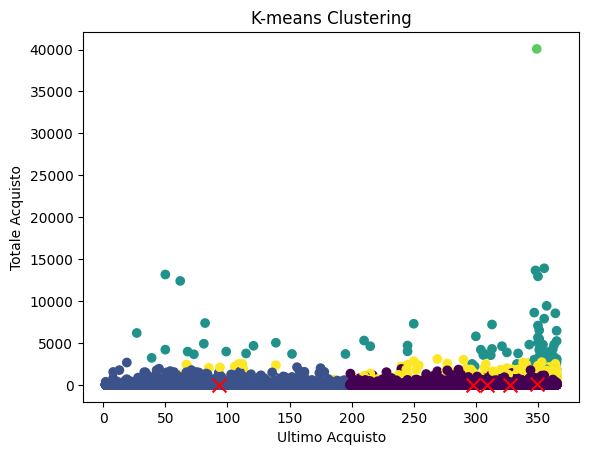

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['ultimo acquisto'], df['totale acquisto'], c=df['Cluster'], cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100)
plt.xlabel('Ultimo Acquisto')
plt.ylabel('Totale Acquisto')
plt.title('K-means Clustering')
plt.show()

In this context, the graphical depiction resulting from the Elbow method exhibited a lack of a
distinct elbow point, prompting a series of comprehensive tests involving various cluster
counts. Simultaneously, attention was directed toward the Silhouette Score, a quantitative
metric facilitating the evaluation of cluster quality. Despite the closely competitive scores for
cluster counts of 2, 4, and 6, the silhouette score consistently advocated for the utilization of 5
clusters. While the distinction between scores for 4 and 5 clusters remained marginal, opting
for 5 clusters led to the presence of a solitary cluster containing just one customer. In contrast,
the decision to proceed with 4 clusters resulted in the formation of clusters encompassing
10871, 10679, 1058, and 17 customers respectively. It was observed that the K-means
algorithm struggled to produce coherent clusters, signifying its suboptimal performance in this
context

In [ ]:
pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=93df8ff4d0591aad12a509403b79bb48868f7afa23fc5cf4009846fc5fefa956
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


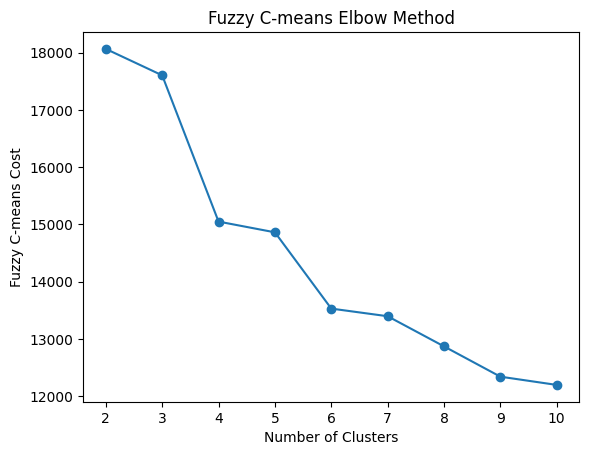

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import skfuzzy as fuzz

rfm_data = df.drop(["RECENCY", "FREQUENCY", "MONETARY", "CONCAT"], axis=1)
rfm_features = df[['ultimo acquisto', 'numero acquisti', 'totale acquisto']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(rfm_features)

fcm_costs = []
for num_clusters in range(2, 11):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        scaled_data.T, num_clusters, 2, error=0.05, maxiter=2000, init=None
    )
    fcm_costs.append(np.sum(u ** 2))

plt.plot(range(2, 11), fcm_costs, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Fuzzy C-means Cost')
plt.title('Fuzzy C-means Elbow Method')
plt.show()

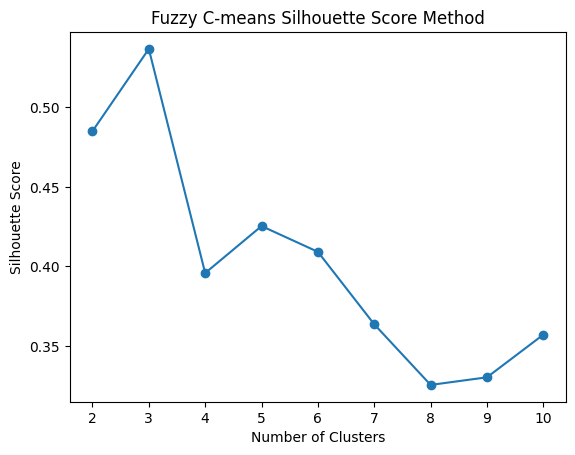

In [ ]:
rfm_data = df.drop(["RECENCY", "FREQUENCY", "MONETARY", "CONCAT"], axis=1)
rfm_features = df[['ultimo acquisto', 'numero acquisti', 'totale acquisto']]

silhouette_scores = []
for num_clusters in range(2, 11):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        scaled_data.T, num_clusters, 2, error=0.005, maxiter=1000, init=None
    )
    cluster_membership = np.argmax(u, axis=0)
    silhouette_scores.append(silhouette_score(scaled_data, cluster_membership))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Fuzzy C-means Silhouette Score Method')
plt.show()


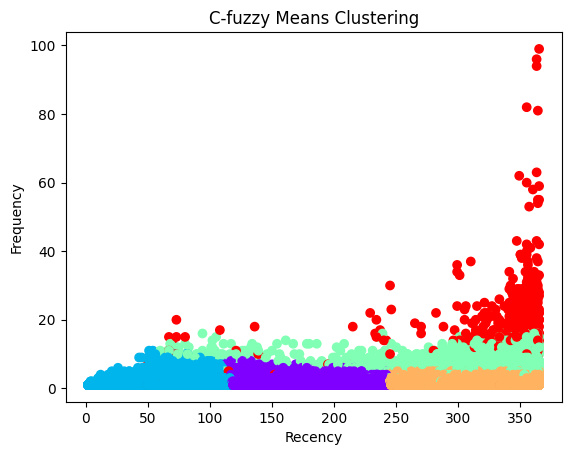

In [ ]:
rfm_data = (df.drop(["RECENCY","FREQUENCY","MONETARY","CONCAT"], axis=1))
rfm_features = df[['ultimo acquisto', 'numero acquisti', 'totale acquisto']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(rfm_features)

c = 5
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    scaled_data.T, c, 2, error=0.005, maxiter=1000, init=None
)

cluster_membership = np.argmax(u, axis=0)

rfm_data['Fuzzy_CMeans_Cluster'] = cluster_membership

plt.scatter(rfm_data['ultimo acquisto'], rfm_data['numero acquisti'], c=rfm_data['Fuzzy_CMeans_Cluster'], cmap='rainbow')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('C-fuzzy Means Clustering')
plt.show()

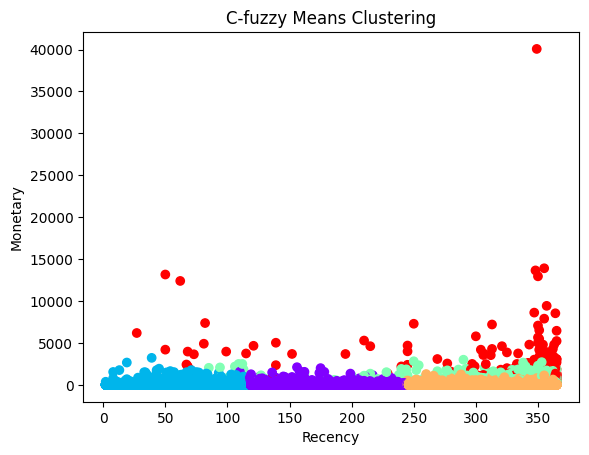

In [ ]:
# Visualize the C-fuzzy means clusters on a 2D scatter plot(including 'totale acquisto')
plt.scatter(rfm_data['ultimo acquisto'], rfm_data['totale acquisto'], c=rfm_data['Fuzzy_CMeans_Cluster'], cmap='rainbow')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('C-fuzzy Means Clustering')
plt.show()

In [ ]:
cluster_avg_info = rfm_data.groupby('Fuzzy_CMeans_Cluster')[['ultimo acquisto', 'numero acquisti', 'totale acquisto']].mean()

print("Number of Customers in Each Cluster:")
print(rfm_data['Fuzzy_CMeans_Cluster'].value_counts())

print("\nAverage Information for Each Cluster:")
print(cluster_avg_info)

Number of Customers in Each Cluster:
3    7667
1    7081
0    5134
2    2201
4     542
Name: Fuzzy_CMeans_Cluster, dtype: int64

Average Information for Each Cluster:
                      ultimo acquisto  numero acquisti  totale acquisto
Fuzzy_CMeans_Cluster                                                   
0                          176.036034         1.696143        53.290505
1                           62.880949         1.772913        64.789857
2                          318.923671         8.016356       332.310593
3                          311.016304         1.910786        52.771283
4                          333.784133        20.527675      1645.994293


**Fuzzy C-means applying for the dataset with the log transformation method**

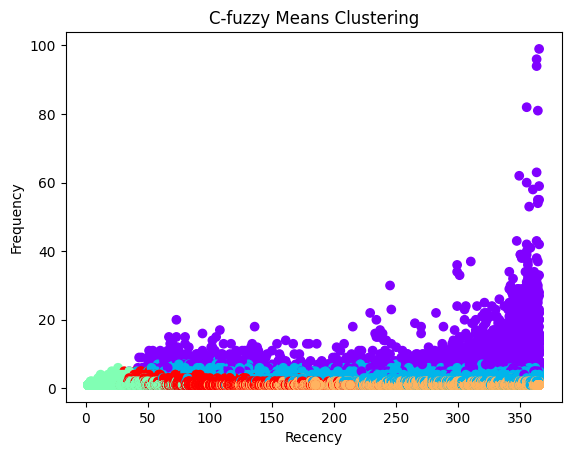

In [ ]:
rfm_data1 = (df.drop(["RECENCY","FREQUENCY","MONETARY","CONCAT"], axis=1))
log_rfm_features = np.log1p(rfm_features)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(log_rfm_features)

c = 5
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    scaled_data.T, c, 2, error=0.005, maxiter=1000, init=None
)
cluster_membership = np.argmax(u, axis=0)

rfm_data1['Fuzzy_CMeans_Cluster'] = cluster_membership

# Visualize the C-fuzzy means clusters on a 2D scatter plot
plt.scatter(rfm_data1['ultimo acquisto'], rfm_data1['numero acquisti'], c=rfm_data1['Fuzzy_CMeans_Cluster'], cmap='rainbow')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('C-fuzzy Means Clustering')
plt.show()

In [ ]:
cluster_avg_info = rfm_data1.groupby('Fuzzy_CMeans_Cluster')[['ultimo acquisto', 'numero acquisti', 'totale acquisto']].mean()

print("Number of Customers in Each Cluster:")
print(rfm_data1['Fuzzy_CMeans_Cluster'].value_counts())

print("\nAverage Information for Each Cluster:")
print(cluster_avg_info)

Number of Customers in Each Cluster:
3    6994
1    5375
4    4486
2    3033
0    2737
Name: Fuzzy_CMeans_Cluster, dtype: int64

Average Information for Each Cluster:
                      ultimo acquisto  numero acquisti  totale acquisto
Fuzzy_CMeans_Cluster                                                   
0                          293.617830        10.570332       626.470869
1                          265.848186         3.157767       122.116787
2                           34.986482         1.168480        25.309895
3                          259.032885         1.161138        13.655593
4                          103.900357         1.585600        48.419918


The analysis transitioned to the utilization of the Fuzzy C-means algorithm; a method typically
suitable for customer segmentation. A logarithmic transformation was applied to the data to
address the skewed distribution, as far as a wide range of values, including extreme outliers
has a certain impact on the data. The logarithmic transformation can help bring the distribution
closer to normal (Gaussian) distribution, which can be advantageous for clustering algorithms.

The Elbow method suggested that 5 to 6 clusters could be optimal, while the Silhouette Score
demonstrated that 2, 3, 4, or 5 clusters held the highest scores, albeit displaying a diminishing
trend. Similar to the K-means approach, domain expertise, and data characteristics prompted
the selection of 5 clusters. The resultant clusters comprised 6994, 5375, 4486, 3033, and 2737
customers in Clusters 1, 0, 3, 4, and 2, respectively. Notably, this approach led to more
balanced and generalized clusters that exhibited characteristics more aligned with the specific
attributes of the data. Although the utilization of log transformation appeared to flatten the data
distribution and foster homogeneity among consumers, it raised concerns about potentially
distorting the true representation of the data.

**Subsequently, the Fuzzy C-means analysis was repeated without the logarithmic
transformation, utilizing the standard scaler method. The Elbow method exhibited a stronger
signal, indicating a decisive cluster count. The Silhouette Score once again highlighted the
prominence of 2, 3, and 5 clusters, although the evaluation's contingency was acknowledged.
The resulting clusters contained 7667, 7081, 5134, 2201, and 542 customers in Clusters 4, 0,
3, 1, and 2, respectively.**



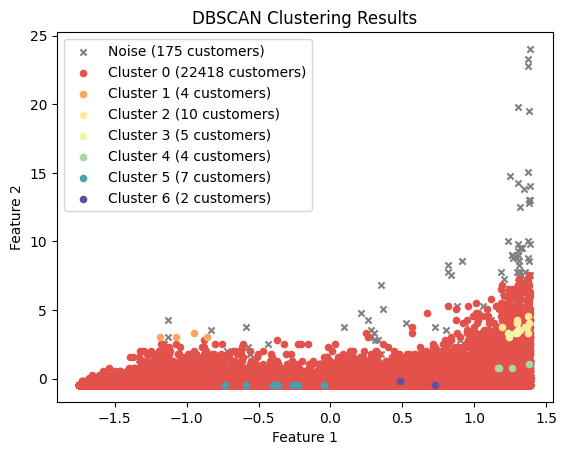

In [ ]:
from collections import Counter

rfm_features = df[['ultimo acquisto', 'numero acquisti', 'totale acquisto']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(rfm_features)

eps = 0.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_membership = dbscan.fit_predict(scaled_data)

cluster_counts = Counter(cluster_membership)

unique_labels = np.unique(cluster_membership)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        plt.scatter(scaled_data[cluster_membership == label, 0], scaled_data[cluster_membership == label, 1], color='gray', s=20, marker='x', label=f'Noise ({cluster_counts[label]} customers)')
    else:
        plt.scatter(scaled_data[cluster_membership == label, 0], scaled_data[cluster_membership == label, 1], color=color, s=20, label=f'Cluster {label} ({cluster_counts[label]} customers)')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering Results')
plt.legend()
plt.show()

To further explore clustering, DBSCAN was employed. However, upon comparison, DBSCAN
appeared to produce incongruous clusters. This outcome was attributed to the algorithm's
reliance on density-based criteria, which could lead to suboptimal results when handling
clusters with varying densities. Particularly, if one cluster is less dense than others, DBSCAN
may fail to recognize it as a distinct cluster. The algorithm, in this case, set with eps = 0.5 (the
maximum distance between samples to be in the same neighborhood), cannot convincingly
circumscribe the clusters; the result is a disproportionately large cluster that contains more
than 99% of the customers. Sometimes, the nature of the data might be such that it doesn't
naturally form distinct clusters. In such cases, clustering might not provide meaningful insights.
Some datasets might not be well-suited for certain clustering algorithms.